<a href="https://colab.research.google.com/github/jcmachicaocuf/programacion/blob/main/Red_Neuronal_vs_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Comparación entre regresión lineal y red neuronal en PyTorch

Este cuaderno permite visualizar cómo una red neuronal puede ajustarse a datos simples, comparándola con una regresión lineal.

In [1]:
# --- IMPORTAR LIBRERÍAS ---
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

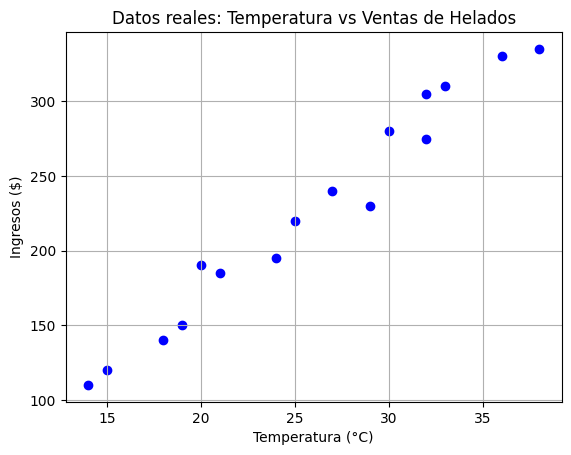

In [17]:
# --- DATOS SIMULADOS: Ingresos de helados según la temperatura ---
temperaturas = torch.tensor([[15.], [18.], [21.], [24.], [27.], [30.], [33.], [36.], [14.], [19.], [20.], [25.], [29.], [32.], [32.], [38.]], dtype=torch.float32)
ventas = torch.tensor([[120.], [140.], [185.], [195.], [240.], [280.], [310.], [330.], [110.], [150.], [190.], [220.], [230.], [275.], [305.], [335.]], dtype=torch.float32)

# Visualizar datos
plt.scatter(temperaturas, ventas, color='blue')
plt.xlabel("Temperatura (°C)")
plt.ylabel("Ingresos ($)")
plt.title("Datos reales: Temperatura vs Ventas de Helados")
plt.grid(True)
plt.show()

## 📈 Modelo 1: Regresión Lineal Simple

In [18]:
# Crear modelo de regresión lineal
modelo_lineal = nn.Linear(1, 1)

# Definir función de pérdida y optimizador
criterio = nn.MSELoss()
optimizador = torch.optim.SGD(modelo_lineal.parameters(), lr=0.001)

# Entrenar el modelo
for epoca in range(500):
    predicciones = modelo_lineal(temperaturas)
    loss = criterio(predicciones, ventas)
    optimizador.zero_grad()
    loss.backward()
    optimizador.step()

## 🧠 Modelo 2: Red Neuronal Simple

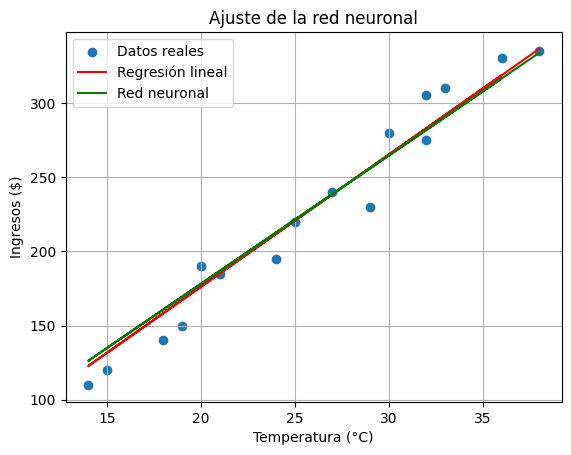

In [19]:
# Crear red neuronal con 1 capa oculta
modelo_nn = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

# Nuevo optimizador
optimizador_nn = torch.optim.Adam(modelo_nn.parameters(), lr=0.01)

# Entrenar red neuronal
for epoca in range(1000):
    predicciones = modelo_nn(temperaturas)
    loss = criterio(predicciones, ventas)
    optimizador_nn.zero_grad()
    loss.backward()
    optimizador_nn.step()

# Graficar resultados
plt.scatter(temperaturas, ventas, label="Datos reales")
plt.plot(temperaturas, modelo_lineal(temperaturas).detach(), color='red', label="Regresión lineal")
plt.plot(temperaturas, modelo_nn(temperaturas).detach(), color='green', label="Red neuronal")
plt.title("Ajuste de la red neuronal")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Ingresos ($)")
plt.legend()
plt.grid(True)
plt.show()

## 🧪 Experimentación sugerida
- Cambiar número de neuronas ocultas
- Probar distintas funciones de activación (`ReLU`, `Sigmoid`, `Tanh`)
- Cambiar optimizadores (`SGD`, `Adam`, etc.) y tasas de aprendizaje
- Observar diferencias entre modelos